In [ ]:
# Part II - (Prosper Loan Data Exploration)
## by (Aly Abdelkader)


## Investigation Overview

Our analysis consisted to performe an exploratory and explicative visual analysis of the prosper loan dataset and  find out what factors affect a BorrowerAPR and  borrower’s interest rate (BorrowerRate). 
 Through this exploration, we discovered that most of the borrowers come from The California State, and we also find out that, the higher the Credit Score, the lower  the  BorrowerAPR and BorrowerRate. Also, retired people tend to have low APR and low rates, consequently, enduring lower costs on loans compared to part-timers.


## Dataset Overview

We started our analysis with  113,937 records and  81 variables. After the Wrangling process we ended up with 22570 record and 19 variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

From the barchart, we can oberved see that most of the borrowers come from California and illinois State. This could be a good business opportunity for lenders to open more agencies for loans in California State.

Text(0.5,1,'Distribution of loans by States')

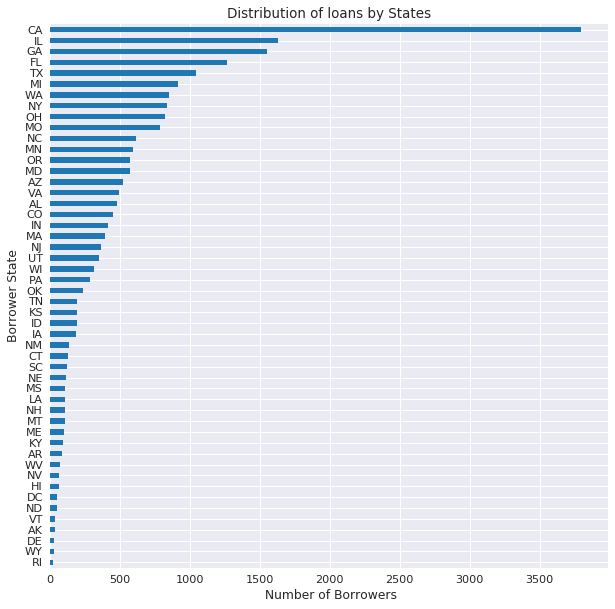

In [4]:
# By using a bar chart, we can check for the distribution of loans by state since this is a categorical variable
color= sb.color_palette()[0]
x= df['BorrowerState'].value_counts(sort=True, ascending=True)
plt.figure(figsize=(10, 10))
sb.set(style="darkgrid")
sb.set(font_scale=1.12)
x.plot(kind='barh',color = color)
plt.xlabel(' Number of Borrowers')
plt.ylabel('Borrower State')
plt.title('Distribution of loans by States')

## (Visualization 2)

From the heatmap plot, there is a strong positive correlation between BorrowerAPR and BorrowerRate, then between LoanOriginalAmount and MonthlyLoanPayment. On the other hand, the CreditScoreAVG negatively correlate with BorrowerAPR and BorrowerRate. This means the higher the borrower's credit score, the lower his loan's rate and annual percentage rate. Based on the heatmap observation we take a closer look between the BorrowerAPR and CreditScoreAvg  with a Regression plot plot since these are two numeric variables.

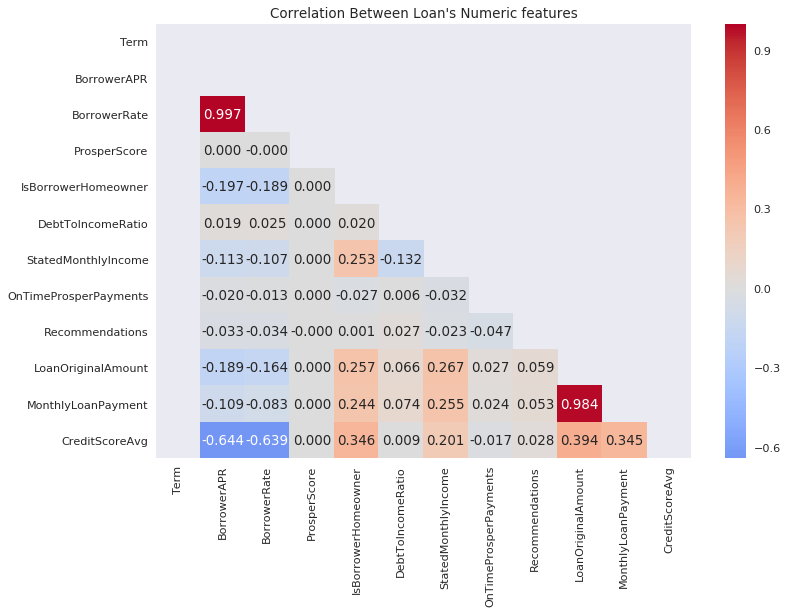

In [6]:
# Using a heatmap plot, We look for the pair with the strongest correlation among numeric variables
mask = np.zeros_like(df.corr(), dtype=np.bool)
plt.figure(figsize=(12, 8))
mask[np.triu_indices_from(mask)] = True
sb.heatmap(df.corr(), annot = True, fmt = '.3f', cmap = 'coolwarm', center = 0, mask=mask)
plt.title("Correlation Between Loan's Numeric features");

Text(0.5,0,'CreditScoreAvg')

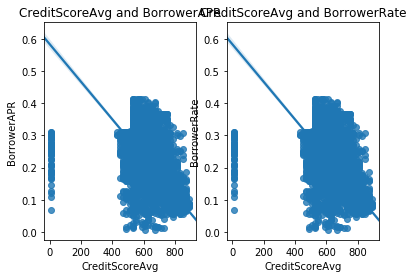

In [5]:
# Based on the previous observation we take a closer look between the BorrowerAPR and CreditScoreAvg 
# with a Regresion plot plot since these are two numeric variables.
plt.subplot(1,2,1)


sb.regplot(data=df, y='BorrowerAPR', x='CreditScoreAvg')
plt.title('CreditScoreAvg and BorrowerAPR')
plt.ylabel('BorrowerAPR')
plt.xlabel('CreditScoreAvg')

plt.subplot(1,2,2)


sb.regplot(data=df, y='BorrowerAPR', x='CreditScoreAvg')
plt.title('CreditScoreAvg and BorrowerRate')
plt.ylabel('BorrowerRate')
plt.xlabel('CreditScoreAvg')

## (Visualization 3)

From a FacetGrid plot, we can see that part-timer in many listing category seems to have higher APR and BorrowerRate mode (AUto, Student use, Home improvement, Debt consolidation). On the other hand, retired people tend to have low APR and low Rates mode. As such, retired endure lower costs on loans compared to part-timers.

Text(0.5,0.98,'EmploymentStatus and ListingCategory influence on BorrowerRate')

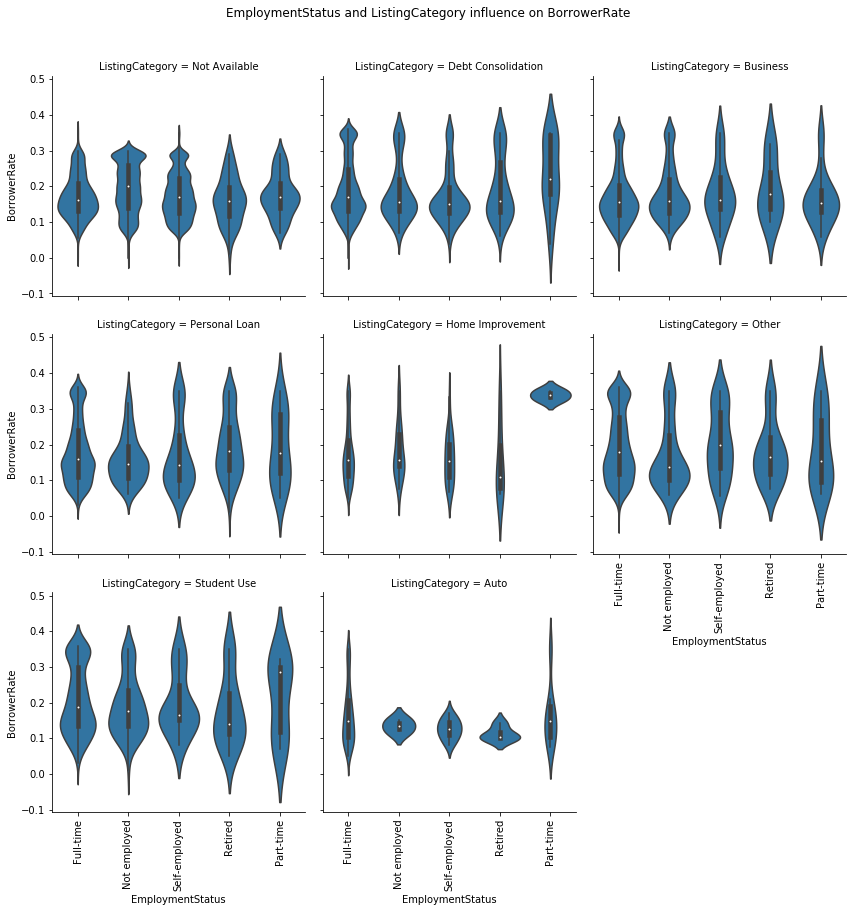

In [18]:
g = sb.FacetGrid(data = df, col = 'ListingCategory', size = 4,col_wrap = 3, margin_titles = True)
g.map(sb.violinplot, 'EmploymentStatus', 'BorrowerRate')
g.fig.subplots_adjust(top=0.9)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.suptitle('EmploymentStatus and ListingCategory influence on BorrowerRate')